# Классификация новостных лент: пример классификации в несколько классов 

В этом разделе мы создадим сеть для классификации новостных лент агентства Reuters на 46 взаимоисключающих тем. Так как теперь количество классов больше двух, эта задача относится к категории задач многоклассовой классификации; и, поскольку каждый экземпляр данных должен быть отнесен только к одному классу, эта задача является примером однозначной многоклассовой классификации. Если бы каждый экземпляр данных мог принадлежать нескольким классам (в данном случае темам), эта задача была бы примером многозначной многоклассовой классификации.

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
#Перед нами закодированная новость
#Перед нами лист целых чисел, которые представляют собой индексы слов
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
#Декодируем их
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [11]:
for word in decoded_newswire:
    print(word, end = ' ')

? ? ? s a i d a s a r e s u l t o f i t s d e c e m b e r a c q u i s i t i o n o f s p a c e c o i t e x p e c t s e a r n i n g s p e r s h a r e i n 1 9 8 7 o f 1 1 5 t o 1 3 0 d l r s p e r s h a r e u p f r o m 7 0 c t s i n 1 9 8 6 t h e c o m p a n y s a i d p r e t a x n e t s h o u l d r i s e t o n i n e t o 1 0 m l n d l r s f r o m s i x m l n d l r s i n 1 9 8 6 a n d r e n t a l o p e r a t i o n r e v e n u e s t o 1 9 t o 2 2 m l n d l r s f r o m 1 2 5 m l n d l r s i t s a i d c a s h f l o w p e r s h a r e t h i s y e a r s h o u l d b e 2 5 0 t o t h r e e d l r s r e u t e r 3 

In [7]:
train_labels[10]

3

In [29]:
len(train_data[1230])

102

In [37]:
#Кодирование данных
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [41]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [47]:
#to_one_hot() функция уже реализован

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [51]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [53]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [127]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [56]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 276us/step - loss: 2.6972 - accuracy: 0.4970 - val_loss: 1.7292 - val_accuracy: 0.6420
Epoch 2/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.3985 - accuracy: 0.7107 - val_loss: 1.3027 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 2s 196us/step - loss: 1.0330 - accuracy: 0.7808 - val_loss: 1.1197 - val_accuracy: 0.7700
Epoch 4/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.8170 - accuracy: 0.8250 - val_loss: 1.0361 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.6550 - accuracy: 0.8589 - val_loss: 0.9725 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 180us/step - loss: 0.5191 - accuracy: 0.8935 - val_loss: 0.9179 - val_accuracy: 0.8090
Epoch 7/20
7982/7982 [==============================] - 2s 200us/step - loss

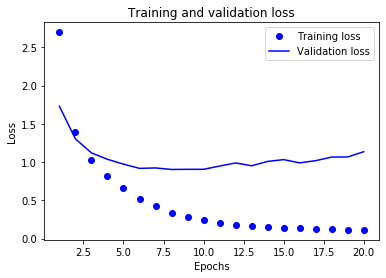

In [62]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

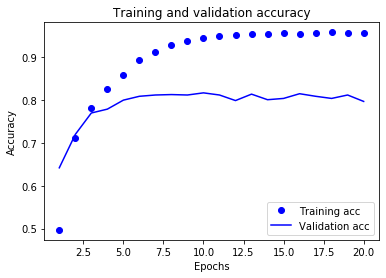

In [66]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [111]:
#Переобучение наступило на 9 эпохе
#При многоклассовой классификации лучше использовать функцию активации 
#softmax, так как она возвращает распределение вероятностей по 46 разным классам
#Для каждого образца на входе сеть будет возрвщать 46-мерный вектор
#Сумма всех 46 элементов всегда будет равна 1

model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs = 9, 
          batch_size = 512, 
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 250us/step - loss: 2.6373 - accuracy: 0.5358 - val_loss: 1.7620 - val_accuracy: 0.6550
Epoch 2/9
7982/7982 [==============================] - 2s 195us/step - loss: 1.4331 - accuracy: 0.7106 - val_loss: 1.3262 - val_accuracy: 0.7120
Epoch 3/9
7982/7982 [==============================] - 2s 197us/step - loss: 1.0725 - accuracy: 0.7730 - val_loss: 1.1581 - val_accuracy: 0.7460
Epoch 4/9
7982/7982 [==============================] - 2s 195us/step - loss: 0.8461 - accuracy: 0.8203 - val_loss: 1.0614 - val_accuracy: 0.7760
Epoch 5/9
7982/7982 [==============================] - 2s 207us/step - loss: 0.6777 - accuracy: 0.8591 - val_loss: 0.9903 - val_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 2s 216us/step - loss: 0.5475 - accuracy: 0.8891 - val_loss: 0.9404 - val_accuracy: 0.8190
Epoch 7/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.441

In [112]:
results

[0.985933784279352, 0.7934104800224304]

In [74]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.17898486197684774

In [79]:
#Предсказания на новых данных
#Каждый элемент это вектор длиной 46, т.к. 46 классов
predictions = model.predict(x_test)

predictions.shape

(2246, 46)

In [81]:
#Сумма всех вероятностей равна 1
np.sum(predictions[0])

1.0

In [82]:
#Элемент с наибольшей вероятностью это предсказанный класс
np.argmax(predictions[0])

3

# Другой способ обработки меток и потерь


In [137]:
#Метки также можно было преобразовать в тензор целых чисел
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [138]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [139]:
#Новая функция потерь равноценна categorical_crossentropy
#Ее отличает только интерфейс
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [140]:
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 245us/step - loss: 2.5619 - acc: 0.5480 - val_loss: 1.7041 - val_acc: 0.6470
Epoch 2/9
7982/7982 [==============================] - 2s 195us/step - loss: 1.4029 - acc: 0.7102 - val_loss: 1.2917 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 2s 194us/step - loss: 1.0479 - acc: 0.7726 - val_loss: 1.1368 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 2s 214us/step - loss: 0.8302 - acc: 0.8202 - val_loss: 1.0217 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 2s 209us/step - loss: 0.6656 - acc: 0.8581 - val_loss: 0.9580 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 2s 204us/step - loss: 0.5321 - acc: 0.8894 - val_loss: 0.9316 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 2s 199us/step - loss: 0.4312 - acc: 0.9097 - val_loss: 0.8922 - val_acc: 0.8140
Epoch 8

In [143]:
results = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 176us/step


In [151]:
results

[1.0130549039781254, 0.7818343639373779]

In [34]:
for i, sequence in enumerate(test_data):
    print(sequence)

[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]
[1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260, 951, 6607, 8, 69, 1749, 

[1, 294, 517, 237, 182, 655, 145, 887, 144, 23, 10, 564, 13, 10, 2456, 1188, 5, 7168, 5, 693, 1561, 6, 1099, 781, 7, 4, 134, 556, 4102, 172, 2281, 567, 31, 287, 4, 655, 62, 163, 6, 1102, 10, 300, 13, 3737, 611, 7168, 3561, 84, 27, 4, 182, 6838, 103, 7484, 50, 16, 2, 41, 419, 228, 272, 18, 1595, 1483, 8, 24, 7, 125, 943, 9411, 6, 4, 2072, 307, 655, 887, 16, 34, 10, 4939, 503, 13, 2770, 51, 299, 45, 761, 1031, 550, 944, 7484, 1444, 16, 40, 2036, 3447, 13, 4, 3440, 5, 1561, 50, 57, 42, 303, 781, 5, 102, 365, 11, 82, 1106, 4, 201, 1445, 330, 30, 1201, 6119, 27, 4, 237, 58, 232, 1723, 13, 7460, 9, 100, 2303, 404, 51, 237, 575, 259, 199, 8, 182, 3058, 3590, 4389, 2, 118, 655, 145, 24, 124, 11, 82, 5, 303, 781, 34, 1609, 6, 1333, 9, 209, 30, 813, 27, 4, 153, 5, 1504, 36, 8, 4, 7484, 300, 7, 1938, 6295, 6, 2, 4, 3447, 13, 3440, 7, 799, 4791, 6625, 2054, 9188, 247, 8190, 875, 7, 1561, 2, 3722, 5, 872, 4, 199, 8, 129, 262, 6201, 2, 4677, 24, 188, 58, 142, 4791, 6625, 2054, 9188, 1275, 41, 57, 6,

In [35]:
arr = np.zeros((3,5))
arr.shape

(3, 5)